# Fractals, part 1: Koch's curve/snowflake

## Introduction

In this series of notebooks, we explore some ideas associated to Fractals, as well as their implementation in Python. In this first part, we will start by constructing Koch's snowflake. Throughout these notebooks, we will frequently use some scientific libraries of python, particularly, numpy and matplotlib.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

First, we have to understand how to represent the fractal mathematically. Let us take a look at some approximations of the fractal:

![title](files/koch.png)

The main idea here is that at each step of the construction, each segment of the curve is divided into three segments of equal length, and over the middle segment, a equilateral triangle is constructed, deleting the base of it. We can show that the length of the limit object (the fractal) is in fact infinite: at the first step, we start with $3$ segments of length $1$. After going to the next step, we end up with $4$ segments for each of the original ones, each of them of length a third of the length of the previous step segments. Mathematically, we can express the length of each step of the construction by

$$ 3\cdot 1 \ , \  4\cdot\dfrac{1}{3} \ , \ 4^2\cdot \left(\dfrac{1}{3} \right)^2 \ , \ \dots , \ 4^n\cdot\left(\dfrac{1}{3} \right)^n \ , \ \dots$$

It is not hart to convince yourself that the above quantity tends to infinity as $n$ grows. A quick loop can help us see this more clearly:

In [4]:
L = 3
for i in range(0,1000):
    L = (4/3)*L
print(L)

2.605300741132187e+125


## Construction of the fractal

### 1. Vectors and matrices

One of the crucial steps towards the successful construction of the fractal is to encode the fractal in an appropriate way. In this notebook, we will encode each step of the fractal by keeping track of the vectors defining each endpoint of each segment. This will allow us to perform the iterative process in a very geometric way. Once we have all the endpoints stored, it will be easy to draw the lines joining them, and consequently, draw each step of the construction of the fractal.

To easily perform linear algebra operations, we will use numpy arrays as the type of variables for the vectors. This allows us to write the operations in a vectorized way, and not componentwise, saving space, time and resources. We assume that the reader has basic knowledge of linear algebra.

One of the most important ingredients of this construction, is the rotation matrix, defined as

In [7]:
R = np.array([[0,-1],[1,0]])

$$ R = \begin{bmatrix}
0 & -1\\ 
1 & 0
\end{bmatrix} $$

This matrix has the property that when we apply it to a vector, it rotates it by $90^\circ$ counterclockwise. This matrix is an isometry, that is, it preserves norms.

In [10]:
print(R.dot(np.array([1,1])))

[-1  1]


Now, if $x,y$ are vectors in the plane, the segment joining $x$ to $y$ can be represented by $y-x$ (it is important to note the order since segments have a direction). Thus, a perpendicular vector to $y-x$ can be represented by $R(y-x)$. It is important to remark again that the rotation is counterclockwise. If we want a normal vector of norm $1$, we can then normalize $n$ and obtain $n = R(y-x)/\|y-x \|$. The last remark before defining the main function of the program, is to notice that the middle point between $x$ and $y$ is the vector $(x+y)/2$, while the points laying in the segment joining $x$ and $y$ dividing it in three segments of equal length are given by $(2/3)\cdot x + (1/3)\cdot y$ and $(1/3)\cdot x + (2/3)\cdot y$.

### 2. Geometric function

We proceed to implement one of the main functions of the program. The input of the function will be a pair of vectors in the plane, and it will return **a list** consisting of five vectors, representing the endpoints of the segment now divided into four new segments.

In [11]:
def third(a,b):
    x = np.array(a)
    y = np.array(b)
    return [x,((2/3)*x+(1/3)*y),(x+y)/2 + (np.sqrt(3)/6)*R.dot(y-x),((1/3)*x+(2/3)*y),y]

To understand the formula giving the third vector, we can proceed step by step. The term $(x+y)/2$ represents the middle point of the segment joining $x$ and $y$. Now, we want to go in the perpendicular direction to this segment, and the distance to this is equal to the height of the equilateral triangle with side $\|y-x \|/3$. This height is given by $\left(\frac{\sqrt{3}}{6}\right)\cdot\|y-x \|$. Multiplying this by the unitary perpendicular vector to $y-x$ and adding it to the middle point, we obtain the disired result.

Once we have a list of vectors, we can put them all in two lists of x and y coordinates and then plot them. We define a function doing this for us. Note that the input of this function is a list of vectors and returns two lists.

In [17]:
def unfold_list(L):
    x_coord = []
    y_coord = []
    for i in range(len(L)):
        x_coord.append(L[i][0])
        y_coord.append(L[i][1])
    return [x_coord,y_coord]

### 3. Iteration function

Now we are ready to build the iterative function. The idea is that we will start with the segment joining the points $(0,0)$ and $(0,3)$, apply our function that breaks up segments and build the equilateral triangle in the middle section.

In [18]:
def koch(n):
    L = [[0,0],[3,0]]
    for i in range(0,n):
        K = []
        l = len(L)
        for s in range(0,l-1):
            t = third(L[s],L[s+1])
            del t[-1] #This avoids that the endpoint of each segment is listed twice 
#(also as the begining point of the next segment)
            K = K + t
        K.append([3,0])
        L = K
    plt.xlim(0, 3)
    plt.ylim(0, 3)
    plt.axis('equal')
    plt.plot(unfold_list(L)[0],unfold_list(L)[1])

We can try now our program and plot different approximations of the fractal by varying the parameter $n$.

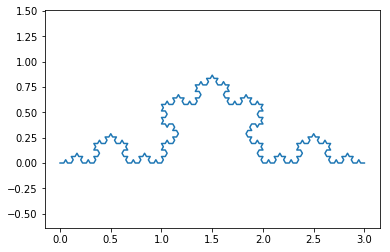

In [24]:
koch(4)

It is worth noting that this construction is iterative and not recursive. A recursive solution can also be given. We leave it as an exercise to the interested reader.